# Notebook for deriving the physics updates for obstacle events

## Diagram

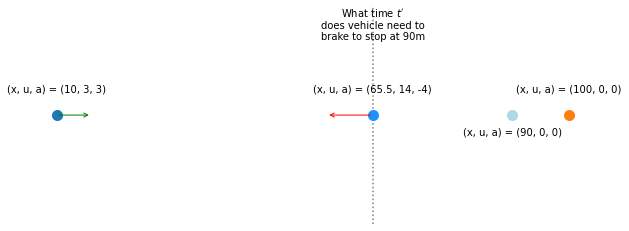

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def arrow_col(a):
    if a < 0:
        return "red"
    elif a > 0:
        return "green"
    else:
        return "black"

def draw_arrow(x, u, a, y, ax):
    ax.annotate("", xytext=(x, y), xy=(x+2*a, y), arrowprops=dict(arrowstyle="->", color=arrow_col(a)))

fig, axs = plt.subplots(1, 1, figsize=(10, 4))

(x1, u1, a1) = (10, 3, 3)
(x1b, u1b, a1b) = (90 + 14**2/(-2*4), 14, -4)
(x1s, u1s, a1s) = (90, 0, 0)
(x2, u2, a2) = (100, 0, 0)
y = 10
buff = 4
ax = axs
ax.scatter(x1, y, s=100)
ax.scatter(x1b, y, s=100, color="dodgerblue")
ax.scatter(x1s, y, s=100, color="lightblue")
ax.scatter(x2, y, s=100)
ax.annotate(f"(x, u, a) = {x1, u1, a1}", (x1, y), (x1, y+0.1), va="bottom", ha="center")
ax.annotate(f"(x, u, a) = {x1b, u1b, a1b}", (x1b, y), (x1b, y+0.1), va="bottom", ha="center")
ax.annotate(f"(x, u, a) = {x1s, u1s, a1s}", (x1s, y), (x1s, y-0.1), va="bottom", ha="center")
ax.annotate(f"(x, u, a) = {x2, u2, a2}", (x2, y), (x2, y+0.1), va="bottom", ha="center")
ax.set(xlim=(x1-buff, x2+buff), ylim=(y-0.5, y+0.5))
draw_arrow(x1, u1, a1, y, ax)
draw_arrow(x1b, u1b, a1b, y, ax)
draw_arrow(x1s, u1s, a1s, y, ax)
draw_arrow(x2, u2, a2, y, ax)
ax.vlines(x1b, y-0.5, y+0.5, ls=":", color="grey", zorder=-1)
ax.annotate("What time $t'$\ndoes vehicle need to\nbrake to stop at 90m", (x1b, y+0.5), (x1b, y+0.5), fontsize="medium", va="top", ha="center")
ax.axis("off")
plt.show()

## Equations

Object $\boldsymbol{V}_i$ is described by a tuple, $\boldsymbol{V}_i = (\text{position}, \text{speed}, \text{acceleration})$. We write this as a function of time as:
$$
\boldsymbol{V}_i(t) = (x_i(t), u_i(t), a_i(t))
$$

Given constant initial conditions, and constant accelerations, we can write the components for any object as:
\begin{align*}
x_i(t) &= x_i(0) + u_i(0)t + \frac{1}{2}a_i(0)t^2\\
u_i(t) &= u_i(0) + a_i(0)t\\
a_i(t) &= a_i(0)
\end{align*}

For two objects, such as a vehicle behind an obstacle, we can write down their \textit{relative} position, speed and acceleration also as a function of time $t$.

\begin{align*}
\Delta x(t) &= \Delta x(0) + \Delta u(0)t + \frac{1}{2}\Delta a(0)t^2\\
\Delta u(t) &= \Delta u(0) + \Delta a(0)t\\
\Delta a(t) &= \Delta a(0)
\end{align*}

For convenience, when explicitly considering two objects, we drop the $\Delta$ notation, so that we have:
\begin{align*}
x(t) &= x(0) + u(0)t + \frac{1}{2}a(0)t^2\\
u(t) &= u(0) + a(0)t\\
a(t) &= a(0)
\end{align*}


## Deriving the time of a reaction to obstacle

With the relative equations set-up, we now derive the time at which a reaction is required from vehicle $i$ to obstacle $j$ (could be vehicle, pedestrian, etc).

We split the total time $t$ into two parts:
1. $0 \le t < t'$: vehicle $V$ continues without changing it's acceleration
2. $t' \le t < t_B$: vehicle $V$ switches to relative deceleration of $a(t) = a_B$ with respect to obstacle

We wish to calculate the `ReactionToObstacle` time $t'$ at which the $V$ reacts and begins to brake.

Two conditions required at the final stop time $t_B$ are necessary to determine $t'$:
1. The relative position of the vehicle is $B$ behind the obstacle
2. The relative speed is 0

We can express this using our formulation as:
\begin{align*}
x(t_B) &= -B\\
u(t_B) &= 0\\
\end{align*}

And with the time period split in two with seperate accelerations:
$$
x(t_B)  = \underbrace{\left(x(0) + u(0)t' + \frac{1}{2}a(0)t'^2\right)}_{\text{Rel position after time } t'} + \underbrace{\left(u(0) + a(0)t'\right) }_{\text{Rel speed after time }t'}(t_B - t') + \frac{1}{2}a_B(t_B - t')^2
$$
with $t_B - t'$ the total time spent decelerating. We can also write down the relative speed at $t_B$:
$$
u(t_B) = (u(0) + a(0)t') + a_B (t_B - t')
$$

We can now apply our conditions, setting $u(t_B) = 0$, we find:
$$
(t_B - t') = -\frac{u(0) + a(0)t'}{a_B}
$$
allowing us to substitute into our equation for $x(t_B)$ and eliminate $t_B$, finding:
\begin{align*}
x(t_B) &= (x(0) + u(0)t'+\frac{1}{2}a(0)t'^2) - \frac{(u(0) + a(0)t')^2}{2a_B}\\
&= \frac{a(0)}{2}\left(1 - \frac{a(0)}{a_B}\right) t'^2 + u(0)\left(1-\frac{a(0)}{a_B}\right) t' + \left(x(0) - \frac{u(0)^2}{2a_B}\right) \\
&= -B
\end{align*}

For convenience, we drop the $(0)$, such that $x:=x(0)$, $u:=u(0)$ and $a:=a(0)$, define:
$$
\gamma = \left(1 - \frac{a}{a_B}\right)
$$
and write this quadratic in $t'$ as:
$$
\frac{a}{2}\gamma t'^2 + u\gamma t' + \left(x - \frac{u^2}{2a_B} + B \right) = 0\\
$$

We can now solve to $t'$ under different scenarios.

#### **Case 1**: obstacle and vehicle not accelerating, $a=0,\, a_B < 0$
In this case, we note that the equation for $x(t_B)$ is no longer quadratic in $t'$ with $\gamma=1$ and has the solution:
$$
t' = \frac{1}{u}\left(\left(-B + \frac{u^2}{2a_B}\right) - x\right)
$$
which can be understood as the time for the distance travelled up to the braking point.

#### **Case 2**: obstacle not accelerating, vehicle accelerating, $a\ne0,\, a_B < 0$
When $a\ne0$, we need to solve the quadratic in $t'$ finding solution:
$$
t' = \frac{-u\gamma + \sqrt{(u\gamma)^2 - 2a\gamma\left(x - \frac{u^2}{2a_B} + B\right)}}{a\gamma}
$$
with only the positive root relevent given
$$
x - \frac{u^2}{2a_B} + B < 0
$$

#### **Case 3**: obstacle decelerating, $a_{obs} < 0, \, a_B = 0$
As the obstacle is decelerating, we need to map the obstacle forwards in time to the situation where it has stopped and the vehicle behind can apply a relative deceleration.
We therefore consider the time that the obstacle stops which is:
$$
t'' = \frac{-u_{obs}}{a_{obs}}
$$
and at this time the obstacle will now have:
\begin{align}
x(t'')_{obs} &= x_{obs} - \frac{u_{obs}^2}{2a_{obs}} \\
u(t'')_{obs} &= 0 \\
a(t'')_{obs} &= 0\\
\end{align}
We can update our relative equations to:
\begin{align}
x &= x - \frac{u_{obs}^2}{2a_{obs}} \\
u &= u_{veh}\\
a &= a_{veh}\\
\end{align}

We are now in either `Case 1` or `Case 2` above, dependent on whether $a = 0$ and can solve for $t'$ as before.

Providing a positive solution $t' \ge 0$ exists for $t'$, there will be no collision.

If $t' < 0$, a collision event will take place. Handling with an event such as `EmergencyStop` is an option.

### Implementing solutions in python
We now aim to implement the solutions in python and test example cases

In [2]:
MAX_SPEED = 14
MAX_DECELERATION = -4
BUFFER = 1

def get_tuple_at_t(v, t, ROUNDING=9):
    x, u, a = v
    x_t = round(x + u * t + 0.5 * a * t**2, ROUNDING)
    u_t = round(u + a * t, ROUNDING)
    a_t = round(a, ROUNDING)
    return (x_t, u_t, a_t)

def brake(v, a_B=MAX_DECELERATION):
    return (v[0], v[1], a_B)


def get_t_prime(v1, v2, B=BUFFER, a_B=MAX_DECELERATION, ROUNDING=9):
    x1, u1, a1 = v1
    x2, u2, a2 = v2

    # Calculate relative values
    x, u, a = (x1 - x2), (u1 - u2), (a1 - a2)
    
    # Check if Case 3 first, if so, map values to stationary decelerated obs
    if a2 == a_B:
        dist_travelled = -u2**2 / (2 * a2)
        x = x + x2 - (x2 + dist_travelled)
        u = u + u2 - 0
        # a = a + a2 - 0
        a = a1
        

    # Calculate gamma
    gamma = (1 - a/a_B)
    
    # Case 1
    if a == 0:
        if u == 0:
            # Already relative speed is 0
            return None
        t_p = (1/u) * ((-B + u**2/(2*a_B)) - x)
        return round(t_p, ROUNDING)
    # Case 2
    if a != 0:
        if (u*gamma)**2 < 2*a*gamma*(x - u**2 / (2*a_B) + B):
            return np.inf
        else:
            t_p = (
                -u*gamma
                + ((u*gamma)**2 - 2*a*gamma*(x - u**2 / (2*a_B) + B))**0.5
            ) / (a * gamma)
            return round(t_p, ROUNDING)

def time_to_stop(v):
    return -v[1]/v[2]

def time_to_zero_rel_speed(v1, v2):
    return -(v1[1] - v2[1])/v1[2]

### Case 0 example

In [3]:

# TODO: handle case where never meet
v1 = (0, 4, -3)
v2 = (20, 0, 0)

t_p = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print(f"t\'={t_p:.3f}, v1 at t\'={v1_p}")
v1_pb = brake(v1_p)
t_stop = time_to_stop(v1_pb)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print(f"t_B={t_p + t_stop:.3f}, v1 at t_B={v1_stop}")


t'=inf, v1 at t'=(nan, -inf, -3)
t_B=nan, v1 at t_B=(nan, nan, -4)


### Case 1 example

In [4]:

v1 = (0, 14, 0)
v2 = (100, 0, 0)

t_p = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print(f"t\'={t_p:.6f}, v1 at t\'={v1_p}")
v1_pb = brake(v1_p)
t_stop = time_to_stop(v1_pb)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print(f"t_B={t_p + t_stop:.6f}, v1 at t_B={v1_stop}")


t'=5.321429, v1 at t'=(74.499999994, 14.0, 0)
t_B=8.821429, v1 at t_B=(98.999999994, 0.0, -4)


### Case 1B: example with non-zero speed for v2, so following at time t_B

In [5]:

v1 = (80, 14, 0)
v2 = (100, 10, 0)

# v2 = (116, 0, 0)
t_p = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print(f"t\'={t_p:.3f}, v1 at t\'={v1_p}")
v1_pb = brake(v1_p)
# t_stop = time_to_stop(v1_pb)
t_stop = time_to_zero_rel_speed(v1_pb, v2)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print(f"t_B={t_p + t_stop:.3f}, v1 at t_B={v1_stop}, v2 at t_B={get_tuple_at_t(v2, t_p + t_stop)}")


t'=4.250, v1 at t'=(139.5, 14.0, 0)
t_B=5.250, v1 at t_B=(151.5, 10.0, -4), v2 at t_B=(152.5, 10.0, 0)


### Case 2 example

In [6]:

v1 = (0, 4, 3)
v2 = (20, 0, 0)
t_p = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print(f"t\'={t_p:.9f}, v1 at t\'={v1_p}")
v1_pb = brake(v1_p)
t_stop = time_to_stop(v1_pb)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print(f"t_B={t_p + t_stop:.9f}, v1 at t_B={v1_stop}")


t'=1.539638691, v1 at t'=(9.714285712, 8.618916073, 3)
t_B=3.694367709, v1 at t_B=(18.999999996, 0.0, -4)


### Case 2B
Example with non-zero speed for v2, so following at time t_B

In [7]:

v1 = (80, 14, 3)
v2 = (100, 10, 0)

# v2 = (116, 0, 0)
t_p = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print(f"t\'={t_p:.9f}, v1 at t\'={v1_p}")
v1_pb = brake(v1_p)
# t_stop = time_to_stop(v1_pb)
t_stop = time_to_zero_rel_speed(v1_pb, v2)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print(f"t_B={t_p + t_stop:.9f}, v1 at t_B={v1_stop}, v2 at t_B={get_tuple_at_t(v2, t_p + t_stop)}")

t'=1.539638691, v1 at t'=(105.110672622, 18.618916073, 3)
t_B=3.694367709, v1 at t_B=(135.943677089, 10.0, -4), v2 at t_B=(136.943677092, 10.0, 0)


### Case 3 example


In [8]:

v1 = (0, 14, 3)
v2 = (25, 10, MAX_DECELERATION)
t2_stop = time_to_stop(v2)
v2_stop = get_tuple_at_t(v2, t2_stop)
print(f"t\'\'={t2_stop:.9f}, v2 at t\'\'={v2_stop}")

# v2 = (116, 0, 0)
t_p = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print(f"t\'={t_p:.9f}, v1 at t\'={v1_p}")
v1_pb = brake(v1_p)
t_stop = time_to_stop(v1_pb)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print(f"t_B={t_p + t_stop:.9f}, v1 at t_B={v1_stop}, v2 at t_B={get_tuple_at_t(v2, t2_stop)}")

t''=2.500000000, v2 at t''=(37.5, 0.0, -4)
t'=0.466481135, v1 at t'=(6.857142864, 15.399443405, 3)
t_B=4.316341986, v1 at t_B=(36.500000012, 0.0, -4), v2 at t_B=(37.5, 0.0, -4)


### Case 3: Danger case

In [9]:

v1 = (0, 14, 3)
v2 = (10, 10, MAX_DECELERATION)
t2_stop = time_to_stop(v2)
v2_stop = get_tuple_at_t(v2, t2_stop)
print(f"t\'\'={t2_stop:.3f}, v2 at t\'\'={v2_stop}")

# v2 = (116, 0, 0)
t_p = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print(f"t\'={t_p:.9f}, v1 at t\'={v1_p}")
if t_p < 0:
    print("Case 3: t\' is negative, DANGER!")
    t_p = 0
    v1_p = get_tuple_at_t(v1, 0)
v1_pb = brake(v1_p)
t_stop = time_to_stop(v1_pb)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print(f"t_B={t_p + t_stop:.9f}, v1 at t_B={v1_stop}, v2 at t_B={get_tuple_at_t(v2, t2_stop)}")

t''=2.500, v2 at t''=(22.5, 0.0, -4)
t'=-0.124099041, v1 at t'=(-1.714285716, 13.627702877, 3)
Case 3: t' is negative, DANGER!
t_B=3.500000000, v1 at t_B=(24.5, 0.0, -4), v2 at t_B=(22.5, 0.0, -4)


### Case 1 example: restart car test

In [10]:

v1 = (90, 0, 3)
v2 = (100, 0, 0)

t_p = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print(f"t\'={t_p:.3f}, v1 at t\'={v1_p}")
v1_pb = brake(v1_p)
t_stop = time_to_stop(v1_pb)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print(f"t_B={t_p + t_stop:.3f}, v1 at t_B={v1_stop}")


t'=1.852, v1 at t'=(95.142857145, 5.5549206, 3)
t_B=3.240, v1 at t_B=(99.000000004, 0.0, -4)


### Case 1B: example with non-zero speed for v2, so following at time t_B

In [11]:

v1 = (85, 14, 0)
v2 = (100, 9, 0)

# v2 = (116, 0, 0)
t_p = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print(f"t\'={t_p:.3f}, v1 at t\'={v1_p}")
v1_pb = brake(v1_p)
# t_stop = time_to_stop(v1_pb)
t_stop = time_to_zero_rel_speed(v1_pb, v2)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print(f"t_B={t_p + t_stop:.3f}, v1 at t_B={v1_stop}, v2 at t_B={get_tuple_at_t(v2, t_p + t_stop)}")


t'=2.175, v1 at t'=(115.45, 14.0, 0)
t_B=3.425, v1 at t_B=(129.825, 9.0, -4), v2 at t_B=(130.825, 9.0, 0)


### Explore entering danger zone

In [12]:
print("""
Two vehicles involved in set-up at t=0, with tuples:
V1 = (80, 14, 0)
V2 = (100, 9, 0)
Both moving at constant speed with V2 20m ahead of V1 but 5m/s slower.
"""
)
print("---")
print("Worst case scenario calculation of V2 immediately starts braking, what time t' does V1 need to stop at:")
v1 = (80, 14, 0)
v2 = (100, 9, MAX_DECELERATION)
# v1 = (92.0, 14.0, 0)
# v2 = (104.5, 9.0, -4)
t2_stop = time_to_stop(v2)
v2_stop = get_tuple_at_t(v2, t2_stop)
print("V2 stops at:")
print(f"t\'\'={t2_stop:.3f}, v2 at t\'\'={v2_stop}\n")

# Get the t_prime (the time V1 needs to start braking) if this suddenly happened
print("V1 starts braking at:")
t_prime = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_prime)
print(f"t\'={t_prime:.3f}, v1 at t\'={v1_p}\n")
v1_pb = brake(v1_p)
t_stop = time_to_stop(v1_pb)
v1_stop = get_tuple_at_t(v1_pb, t_stop)
print("Final times (t_B) and tuples:")
print(f"t_B={t_prime + t_stop:.9f}, v1 at t_B={v1_stop}, v2 at t_B={get_tuple_at_t(v2, t2_stop)}\n")
print(f"Relative position: {v1_stop[0]-v2_stop[0]:.3f}\n")

# Braking must commence at t_danger_prime
print("Therefore, V1 must start braking at or before t_immediate_brake:")
t_immediate_brake = t_prime
print(t_immediate_brake)


Two vehicles involved in set-up at t=0, with tuples:
V1 = (80, 14, 0)
V2 = (100, 9, 0)
Both moving at constant speed with V2 20m ahead of V1 but 5m/s slower.

---
Worst case scenario calculation of V2 immediately starts braking, what time t' does V1 need to stop at:
V2 stops at:
t''=2.250, v2 at t''=(110.125, 0.0, -4)

V1 starts braking at:
t'=0.330, v1 at t'=(84.625000002, 14.0, 0)

Final times (t_B) and tuples:
t_B=3.830357143, v1 at t_B=(109.125000002, 0.0, -4), v2 at t_B=(110.125, 0.0, -4)

Relative position: -1.000

Therefore, V1 must start braking at or before t_immediate_brake:
0.330357143


In [13]:
print(
"""
However, V1 just looks at V2 currently and calculates braking time
E.g. with non-zero speed for V2, so following at time t_B says V1 can
wait until t'=3.175
"""
)
v1 = (80, 14, 0)
# Now set v2 to not be braking to get times
v2 = (100, 9, 0)
t_prime = get_t_prime(v1, v2)
v1_p = get_tuple_at_t(v1, t_p)
print("V1 must start braking at t\':")
print(f"t\'={t_prime:.3f}, v1 at t\'={v1_p}")
v1_pb = brake(v1_p)
t_rel_speed_zero = time_to_zero_rel_speed(v1_pb, v2)
print(f"t_rel_speed_zero: {t_rel_speed_zero}")
v1_rel_speed_zero = get_tuple_at_t(v1_pb, t_rel_speed_zero)
v2_rel_speed_zero = get_tuple_at_t(v2, t_prime + t_rel_speed_zero)
print(f"t_B={t_prime + t_rel_speed_zero:.3f}, v1 at t_B={v1_rel_speed_zero}, v2 at t_B={v2_rel_speed_zero}")
print(f"Relative position: {v1_rel_speed_zero[0]-v2_rel_speed_zero[0]:.3f}")

# Set t_no_change as t_prime
t_no_change = t_prime

print(
f"""
Relative speed of 0 has been reached with buffer = -1m as required.\n
But assumes V2 did nothing different up to t'={t_no_change}.
"""
)



However, V1 just looks at V2 currently and calculates braking time
E.g. with non-zero speed for V2, so following at time t_B says V1 can
wait until t'=3.175

V1 must start braking at t':
t'=3.175, v1 at t'=(110.45, 14.0, 0)
t_rel_speed_zero: 1.25
t_B=4.425, v1 at t_B=(124.825, 9.0, -4), v2 at t_B=(139.825, 9.0, 0)
Relative position: -15.000

Relative speed of 0 has been reached with buffer = -1m as required.

But assumes V2 did nothing different up to t'=3.175.



In [14]:
print(
"""
We can now test what would happen if V1 delays braking until after some time t_before_brake
"""
)

v1 = (80, 14, 0)
v2 = (100, 9, 0)

print(f"""
Choose some time between {t_immediate_brake:.3f} <= t_before_brake <= {t_no_change:.3f}.
By the immediate brake model, any time up to {t_no_change} should be valid.
"""
)

# Set as 2s
t_before_brake = 2
print(f"> Time before V2 switches to brake set as: {t_before_brake:.3f}\n")

v1_d = get_tuple_at_t(v1, t_before_brake)
v2_d = get_tuple_at_t(v2, t_before_brake)
print("\n1. Tuples at moment V2 switches to brake:")
print(f"> V1_d: {v1_d}, V2_d: {v2_d}")
v2_d_brake = brake(v2_d)
print(f"\n2. Switch V2 to brake:\n> {v2_d_brake}")
print("\n3. Calculate time to stop for V2.\n> Get tuple at V2 stop and time it takes:")
t2_stop = time_to_stop(v2_d_brake)
v2_stop = get_tuple_at_t(v2_d_brake, t2_stop)
print(f"> t\'\'={t2_stop:.3f}, v2 at t\'\'={v2_stop}")

print("\n4. Now we must calculate the t\' brake time for V1 to stop at -B compared relative to V2")
t_prime = get_t_prime(v1_d, v2_d_brake)
print(f"> Total times: {t_prime:.3f}, {t_before_brake:.3f}, {t_prime + t_before_brake:.3f}")
print(f"> t\'={t_prime:.3f}, v1 at t\'={v1_p}")
if t_prime < 0.:
    print("t\' is negative so entered the danger zone and should have started braking earlier!")

v1_p = get_tuple_at_t(v1_d, max(t_prime, 0))
print(f"\n5. V1 at time max(t\', 0):\n> {v1_p}")

print("\n6. Switch V1 to brake:")
v1_pb = brake(v1_p)
print(f"> {v1_pb}")
t1_stop = time_to_stop(v1_pb)
print(f"\n7. Time to stop for V1 after t\':\n> {t1_stop:.3f}")
v1_stop = get_tuple_at_t(v1_pb, t1_stop)
print("\n8. Final time, tuples and relative position:")
print(f"> t_B={t_before_brake + t_prime + t1_stop:.3f}, v1 at t_B={v1_stop}, v2 at t_B={v2_stop}")
print(f"> Relative position at stop: {v1_stop[0] - v2_stop[0]:.3f}")



We can now test what would happen if V1 delays braking until after some time t_before_brake


Choose some time between 0.330 <= t_before_brake <= 3.175.
By the immediate brake model, any time up to 3.175 should be valid.

> Time before V2 switches to brake set as: 2.000


1. Tuples at moment V2 switches to brake:
> V1_d: (108.0, 14, 0), V2_d: (118.0, 9, 0)

2. Switch V2 to brake:
> (118.0, 9, -4)

3. Calculate time to stop for V2.
> Get tuple at V2 stop and time it takes:
> t''=2.250, v2 at t''=(128.125, 0.0, -4)

4. Now we must calculate the t' brake time for V1 to stop at -B compared relative to V2
> Total times: -0.384, 2.000, 1.616
> t'=-0.384, v1 at t'=(110.45, 14.0, 0)
t' is negative so entered the danger zone and should have started braking earlier!

5. V1 at time max(t', 0):
> (108.0, 14, 0)

6. Switch V1 to brake:
> (108.0, 14, -4)

7. Time to stop for V1 after t':
> 3.500

8. Final time, tuples and relative position:
> t_B=5.116, v1 at t_B=(132.5, 0.0, -4), v2 at t_B=(128.12